In [133]:
# 1 Задача
# ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?
#
# Построить точечный график
# Рассчитать коэффициенты корреляции Пирсона и Спирмена
# Построить модель линейной регрессии
# Рассчитать коэффициент детерминации
# Вывести график остатков
#
#
# 2 Задание.
# Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
#
# Разделить данные на 2 группы
# Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности


In [134]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [135]:
water_df = pd.read_csv(r'C:\users\ivnat\projects\netology\pyda-10\statistics_python_hw_3\water.csv')

In [136]:
water_df.info()

# пропусков в данных нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.0+ KB


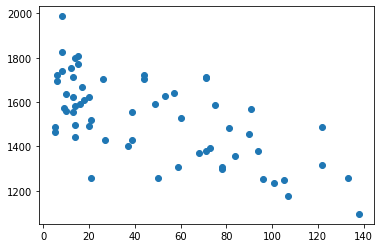

In [137]:
# Построить точечный график

x = water_df.hardness
y = water_df.mortality

plt.scatter(x, y)
plt.show()

# на графике прослеживается отрицательная корреляция - чем ниже жесткость, тем выше смертность
# Связь линейна

In [138]:
# Коэффициент корреляции

water_corr = water_df[['hardness', 'mortality']].corr()
print(water_corr)

           hardness  mortality
hardness   1.000000  -0.654849
mortality -0.654849   1.000000


In [139]:
# Коэффициент корреляции Спирмана

water_corr_sp = water_df[['hardness', 'mortality']].corr(method='spearman')
print(water_corr_sp)

           hardness  mortality
hardness   1.000000  -0.631665
mortality -0.631665   1.000000


In [140]:
# Коэффициент корреляции Пирсона

water_corr_pe = water_df[['hardness', 'mortality']].corr(method='pearson')
print(water_corr_pe)

# Силу корреляции можно оценить как среднюю

           hardness  mortality
hardness   1.000000  -0.654849
mortality -0.654849   1.000000


In [141]:
# Построить модель линейной регрессии

X = water_df[['hardness']]
Y = water_df[['mortality']]
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [142]:
# Рассчитать коэффициент детерминации
model.score(X, Y)

# коэффициент детерминации не превышает 50%, модель дает не очень хорошее предсказание,

0.4288267193124974

In [143]:
print(f"Коэффициент: {model.coef_}, независимая константа: {model.intercept_}")

Коэффициент: [[-3.22609161]], независимая константа: [1676.3556007]


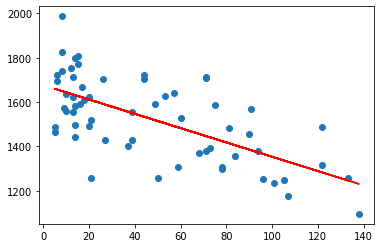

In [144]:
plt.scatter(water_df['hardness'], water_df['mortality'])
plt.plot(water_df['hardness'], model.predict(water_df[['hardness']]), c='r')
plt.show()

In [145]:
# Вывести график остатков
X = sm.add_constant(X)

In [146]:
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     44.30
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           1.03e-08
Time:                        16:43:45   Log-Likelihood:                -388.28
No. Observations:                  61   AIC:                             780.6
Df Residuals:                      59   BIC:                             784.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1676.3556     29.298     57.217      0.0

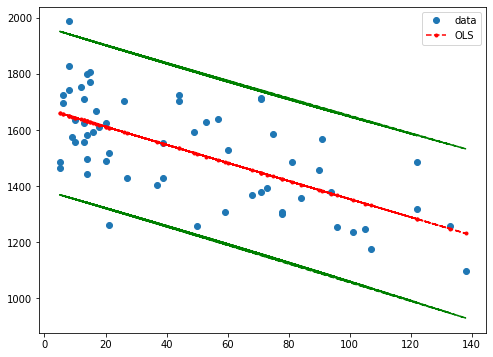

In [147]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X.iloc[:,1], Y, 'o', label="data")
ax.plot(X.iloc[:,1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X.iloc[:,1], iv_u, 'g--')
ax.plot(X.iloc[:,1], iv_l, 'g--')
ax.legend(loc='best');
plt.show()

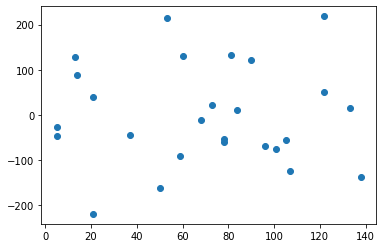

In [186]:
# График остатков

plt.scatter(X.iloc[:, 1], results.resid)
plt.show()

# закономерность не прослеживается, распределение значений выглядит случайно,
# значит линейная модель выбрана верно

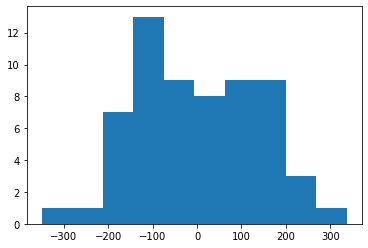

In [149]:
plt.hist(results.resid)
plt.show()

# распределение напоминает нормальное, нет перекосов,
# скопление значений посередине скорее говорит о качестве предсказания модели, небольшой выборке,
# большой рассеянности значений, чем о неправильности выбора модели

In [150]:
### 2 Задание.
# Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
#
# Разделить данные на 2 группы
# Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [151]:
north_water_df = water_df[ water_df['location']=='North' ]
south_water_df = water_df[ water_df['location']=='South' ]

In [152]:
# Север

north_water_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  35 non-null     int64 
 1   location    35 non-null     object
 2   town        35 non-null     object
 3   mortality   35 non-null     int64 
 4   hardness    35 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.4+ KB


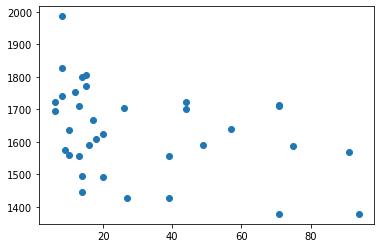

In [153]:
# Построить точечный график

x = north_water_df.hardness
y = north_water_df.mortality

plt.scatter(x, y)
plt.show()

# В отличие от неразделенных данных, зависимость проследивается очень слабо.
# Скорее отрицательная корреляция

In [154]:
# Коэффициент корреляции

north_water_corr = north_water_df[['hardness', 'mortality']].corr()
print(north_water_corr)

           hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000


In [155]:
# Коэффициент корреляции Спирмана

north_water_corr_sp = north_water_df[['hardness', 'mortality']].corr(method='spearman')
print(north_water_corr_sp)

           hardness  mortality
hardness   1.000000  -0.404208
mortality -0.404208   1.000000


In [156]:
# Коэффициент корреляции Пирсона

north_water_corr_pe = north_water_df[['hardness', 'mortality']].corr(method='pearson')
print(north_water_corr_pe)

# коэффициенты корреляции подтверждают предыдущий вывод - корреляция слабая

           hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000


In [157]:
# Построить модель линейной регрессии

X = north_water_df[['hardness']]
Y = north_water_df[['mortality']]


In [158]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [159]:
# Рассчитать коэффициент детерминации
model.score(X, Y)

# качество предсказания очень низкое

0.1358643664207173

In [160]:
model.coef_

array([[-1.93134215]])

In [161]:
model.intercept_

array([1692.31280143])

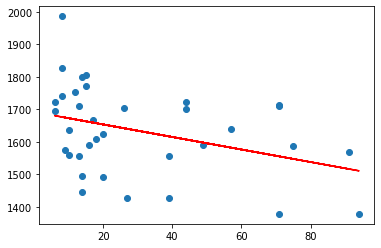

In [162]:
plt.scatter(north_water_df['hardness'], north_water_df['mortality'])
plt.plot(north_water_df['hardness'], model.predict(north_water_df[['hardness']]), c='r')
plt.show()

In [163]:
# Вывести график остатков
X = sm.add_constant(X)

In [164]:
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     5.188
Date:                Fri, 13 Nov 2020   Prob (F-statistic):             0.0293
Time:                        16:43:49   Log-Likelihood:                -218.78
No. Observations:                  35   AIC:                             441.6
Df Residuals:                      33   BIC:                             444.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1692.3128     33.785     50.091      0.0

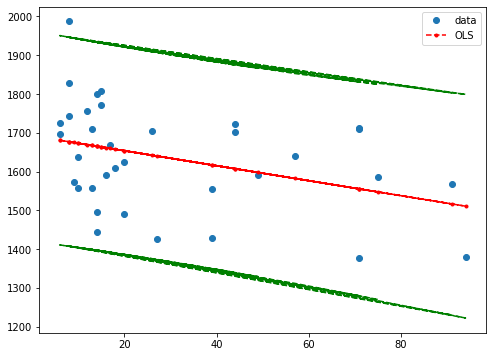

In [165]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X.iloc[:,1], Y, 'o', label="data")
ax.plot(X.iloc[:,1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X.iloc[:,1], iv_u, 'g--')
ax.plot(X.iloc[:,1], iv_l, 'g--')
ax.legend(loc='best');
plt.show()

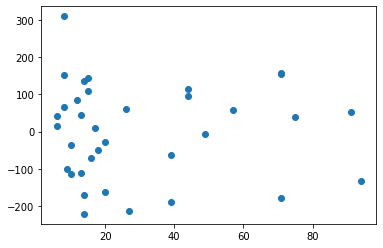

In [166]:
# График остатков

plt.scatter(X.iloc[:, 1], results.resid)
plt.show()

# по графику видно скопление значений в левой части

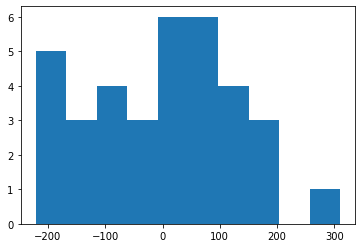

In [167]:
plt.hist(results.resid)
plt.show()


In [168]:
# Юг

south_water_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 59
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  26 non-null     int64 
 1   location    26 non-null     object
 2   town        26 non-null     object
 3   mortality   26 non-null     int64 
 4   hardness    26 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.0+ KB


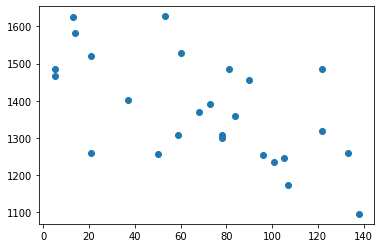

In [169]:
# Построить точечный график

x = south_water_df.hardness
y = south_water_df.mortality

plt.scatter(x, y)
plt.show()

# Разброс значений большой, но зависимость прослеживется явно - отрицательная корреляция

In [170]:
# Коэффициент корреляции

south_water_corr = south_water_df[['hardness', 'mortality']].corr()
print(south_water_corr)

           hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000


In [171]:
# Коэффициент корреляции Спирмана

south_water_corr_sp = south_water_df[['hardness', 'mortality']].corr(method='spearman')
print(south_water_corr_sp)

           hardness  mortality
hardness   1.000000  -0.595723
mortality -0.595723   1.000000


In [172]:
# Коэффициент корреляции Пирсона

south_water_corr_pe = south_water_df[['hardness', 'mortality']].corr(method='pearson')
print(south_water_corr_pe)

# Коэффициенты корреляции так же подтверждают предыдущий вывод. Сила корреляции - средняя.

           hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000


In [173]:
# Построить модель линейной регрессии

X = south_water_df[['hardness']]
Y = south_water_df[['mortality']]
model = LinearRegression()
model.fit(X, Y)

In [175]:
# Рассчитать коэффициент детерминации
model.score(X, Y)

# коэффициент детерминации так же не высокий, точность предсказаний низкая

0.3625885624364604

In [176]:
model.coef_

array([[-2.09271845]])

In [177]:
model.intercept_

array([1522.81504854])

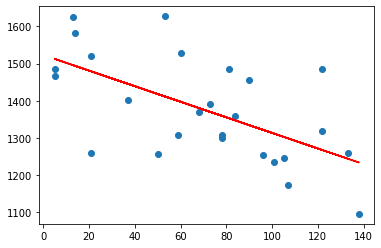

In [178]:
plt.scatter(south_water_df['hardness'], south_water_df['mortality'])
plt.plot(south_water_df['hardness'], model.predict(south_water_df[['hardness']]), c='r')
plt.show()

In [179]:
# Вывести график остатков
X = sm.add_constant(X)

In [180]:
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     13.65
Date:                Fri, 13 Nov 2020   Prob (F-statistic):            0.00113
Time:                        16:43:52   Log-Likelihood:                -159.06
No. Observations:                  26   AIC:                             322.1
Df Residuals:                      24   BIC:                             324.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1522.8150     45.431     33.519      0.0

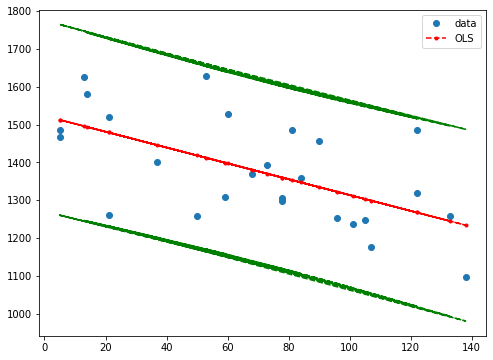

In [181]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X.iloc[:,1], Y, 'o', label="data")
ax.plot(X.iloc[:,1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X.iloc[:,1], iv_u, 'g--')
ax.plot(X.iloc[:,1], iv_l, 'g--')
ax.legend(loc='best');
plt.show()

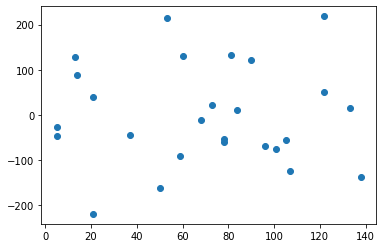

In [182]:
# График остатков

plt.scatter(X.iloc[:, 1], results.resid)
plt.show()


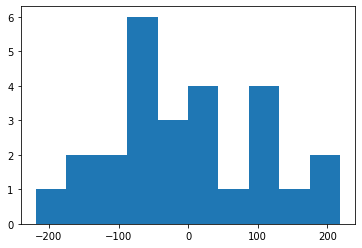

In [183]:
plt.hist(results.resid)
plt.show()
# Для данных по югу, распределение остатков выглядит более случайным, чем для данных по северу

Выводы:

Не совсем корректно использование абсолютных значений смертности,
т.к. показатель может быть связан с размером населения,
возможно результаты были бы лучше при использовании относительных значений

Небольшой размер выборки и большой разброс значений не позволяет выбрать линейную модель с высокой точностью предсказания.

Для все выборки прослеживается средняя отрицательная корреляция между жесткостью воды и смертностью.
Но при разделении выборки по географическому принципу, корреляция для одной группы (юг) снижается,а для другой (север)
практически имчезает. Это можно объяснить 3 способами:
1. Проблема в данных: маленький размер выборки, абсолютные значения вместо относительных
2. Корреляция случайна, между этими явлениями на самом деле нет прямой взаимосвязи,
т.к. при наличии такой взаимосвязи обе группы показывали бы эту взаимосвязь
3. На смертность влияет большее колличество факторов,
поэтому корреляция не носит стабильного характера и меняется при разделении по территориальному признаку
(чтобы сделать более однозначные выводы нужно исключить влиянию прочих факторов)

Лучше всего поведение данных, по моему мнению, объясняют 1 и 3 варианты.